## Intro:
In this document I will redo the previous allan deviaiton calculations to confirm their results and then analyze smalled subsets of the data to look for variation in short time scale behavior.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from AllanDevTK import *
import allantools

In [3]:
#This is the calibration matrix from the second calibration procedure, done on 8/5/2022. It was used to measure
#the direct, intra-lab, and ARL loop back datasets. As on 2/17/2023 it is still the current calibration
#This is the calibration matrix calculated form just the RH states. still not sure whats
#up with the circular stuff but whatever. It was the most recent calibration matrix when the first 

Binv1 = np.matrix([[ 0.19413216,  0.24124604,  0.25528774,  0.23542116,  0.28297409,
          0.27331806],
        [-0.78820545,  0.87125841,  0.02271854,  0.03097218, -0.0960772 ,
         -0.05944514],
        [ 0.1104432 , -0.14219683,  0.79315733, -0.81863442,  0.10269772,
         -0.10722189],
        [ 1.53525503, -1.69411233,  0.52438305, -0.61879786, -1.56278763,
          1.97404885]])


In [4]:
# This is matrix from the first calibration procedure, done on 8/2/2022. This calibration was decent, but the S3
#component of the measurement was not well resolved. Before recalibrating, I took 2 measurements, 3km and
#3km handwarming.
Binv0 = np.matrix([[ 6.11288901e-01,  7.16858019e-01, -4.21419679e-01,  3.19046260e+00,  2.66950622e-01,  1.30739274e+00],
        [-2.32711616e+00,  2.11296740e+00,  7.35031307e-03, 1.34849590e-01, -4.68900488e-01,  1.43265817e-01],
        [ 8.12874080e-01,  1.15114414e+00, -3.43071369e-01, 5.18484569e-01,  2.01026028e+00, -2.44332742e+00],
        [-3.22233696e+00, -2.76818645e+00, -3.97742735e+00, 1.18653040e+01, -4.21107811e+00,  3.49233748e+00]])

In [5]:
#Imports data, applies calibration matrix to convert to stokes params and then plots
dfLoop = pd.read_csv("1550_ARL_10min8:8:16:28:51.csv", header = None).to_numpy()

tArrLoop = dfLoop[:,0]*10**-6 #takes time stamp data from 1st column and converts from us to s
vArrLoop = dfLoop[:, 1:] #grabs columns 1-7 for the 6 voltages
pArrLoop = Volt_to_PState(vArrLoop, Binv1)#defines an array we'll filled with the calculated polarization states
##this normalizes the polarization states by S0.
t1 = time.time()
pLoop = normalize(pArrLoop) 
eLoop = stokesToEllipseArray(pLoop)
print(time.time()-t1)

39.279006242752075


In [38]:
#Imports data, applies calibration matrix to convert to stokes params and then plots
dfDir = pd.read_csv("1550_Direct_10min8:8:15:12:3.csv", header = None).to_numpy()

tArrDir = dfDir[:,0]*10**-6 #takes time stamp data from 1st column and converts from us to s
vArrDir = dfDir[:, 1:] #grabs columns 1-7 for the 6 voltages
pArrDir = Volt_to_PState(vArrDir, Binv1)#defines an array we'll filled with the calculated polarization states
##this normalizes the polarization states by S0. We are only going to use normed states so
## I'll store in same variable
t1 = time.time()
pDir = normalize(pArrDir) 
eDir = stokesToEllipseArray(pDir)
print(time.time()-t1)

47.906418323516846
130.4487841129303


In [39]:
#Imports data, applies calibration matrix to convert to stokes params and then plots
dfLab = pd.read_csv("1550_IntraLab_10min8:8:15:56:13.csv", header = None).to_numpy()

tArrLab = dfLab[:,0]*10**-6 #takes time stamp data from 1st column and converts from us to s
vArrLab = dfLab[:, 1:] #grabs columns 1-7 for the 6 voltages
pArrLab = Volt_to_PState(vArrLab, Binv1)#defines an array we'll filled with the calculated polarization states
##this normalizes the polarization states by S0. We are only going to use normed states so
## I'll store in same variable
t1 = time.time()
pLab = normalize(pArrLab) 
eLab = stokesToEllipseArray(pLab)
print(time.time()-t1)

48.225427865982056
93.28008913993835


In [40]:
#Imports data, applies calibration matrix to convert to stokes params and then plots
df3k = pd.read_csv("1550_3km8:3:16:23:40.csv", header = None).to_numpy()

tArr3k = df3k[:,0]*10**-6 #takes time stamp data from 1st column and converts from us to s
vArr3k = df3k[:, 1:] #grabs columns 1-7 for the 6 voltages
pArr3k = Volt_to_PState(vArr3k, Binv0)#defines an array we'll filled with the calculated polarization states
##this normalizes the polarization states by S0. We are only going to use normed states so
## I'll store in same variable
t1 = time.time()
p3k = normalize(pArr3k) 
e3k = stokesToEllipseArray(p3k)
print(time.time() - t1)

72.29476499557495
133.43154168128967


In [41]:
#Imports data, applies calibration matrix to convert to stokes params and then plots
df3kWarm = pd.read_csv("1550_3km_handwarm8:3:18:48:9.csv", header = None).to_numpy()

tArr3kWarm = df3kWarm[:,0]*10**-6 #takes time stamp data from 1st column and converts from us to s
vArr3kWarm = df3kWarm[:, 1:] #grabs columns 1-7 for the 6 voltages
pArr3kWarm = Volt_to_PState(vArr3kWarm, Binv0)#defines an array we'll filled with the calculated polarization states
##this normalizes the polarization states by S0. We are only going to use normed states so
## I'll store in same variable
t1 = time.time()
p3kWarm = normalize(pArr3kWarm) 
e3kWarm = stokesToEllipseArray(p3kWarm)
print(time.time()-t1)

22.818299770355225
42.275184869766235


In [9]:
stepArr = np.linspace(0,6,100)
stepArr = 10**stepArr
stepArr = [int(x) for x in stepArr]
stepArr = np.unique(stepArr) 
tau = 104*10**-6 #sample period
tauArr = stepArr*tau
stepArr = np.linspace(0,6,100)
stepArr = 10**stepArr
stepArr = [int(x) for x in stepArr]
stepArr = np.unique(stepArr) 
tau = 104*10**-6 #sample period
tauArr = stepArr*tau

In [45]:
Loop = [allantools.oadev(eLoop[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.adev(eLoop[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]

In [49]:
Dir = [allantools.adev(eDir[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.adev(eDir[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]

In [50]:
Lab = [allantools.adev(eLab[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.adev(eLab[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]

In [51]:
Threek = [allantools.adev(e3k[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.adev(e3k[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]

In [55]:
Warm3k = [allantools.adev(e3kWarm[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.adev(e3kWarm[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]

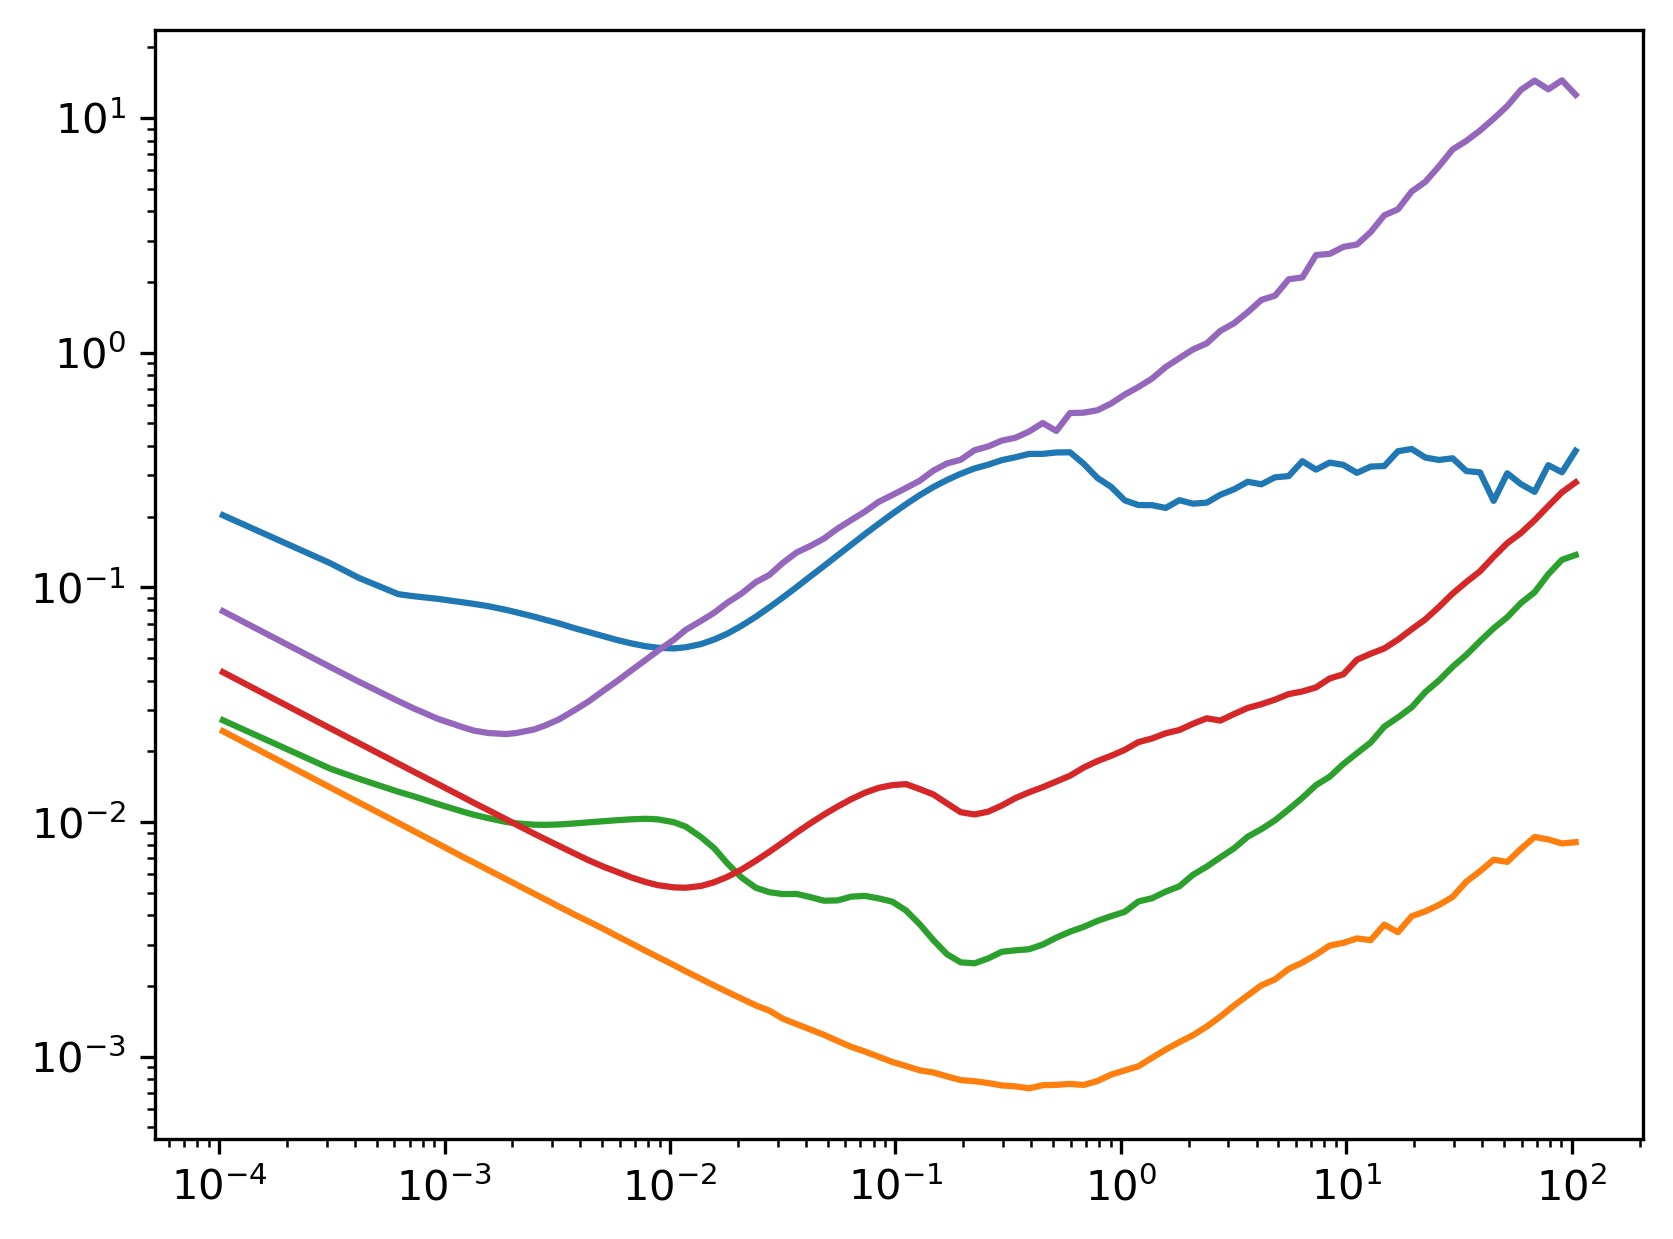

In [62]:
plt.figure(dpi=300)
plt.xscale("log")
plt.yscale("log")
plt.plot(Loop[0][0], Loop[0][1])
plt.plot(Dir[0][0], Dir[0][1])
plt.plot(Lab[0][0], Lab[0][1])
plt.plot(Threek[0][0], Threek[0][1])
plt.plot(Warm3k[0][0], Warm3k[0][1])

In [63]:
Loop = [allantools.oadev(eLoop[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.oadev(eLoop[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]
Dir = [allantools.oadev(eDir[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.oadev(eDir[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]
Lab = [allantools.oadev(eLab[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.oadev(eLab[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]
Threek = [allantools.oadev(e3k[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.oadev(e3k[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]
Warm3k = [allantools.oadev(e3kWarm[:,0], rate = tau**-1, taus=tauArr, data_type="freq"),
        allantools.oadev(e3kWarm[:,1], rate = tau**-1, taus=tauArr, data_type="freq")]

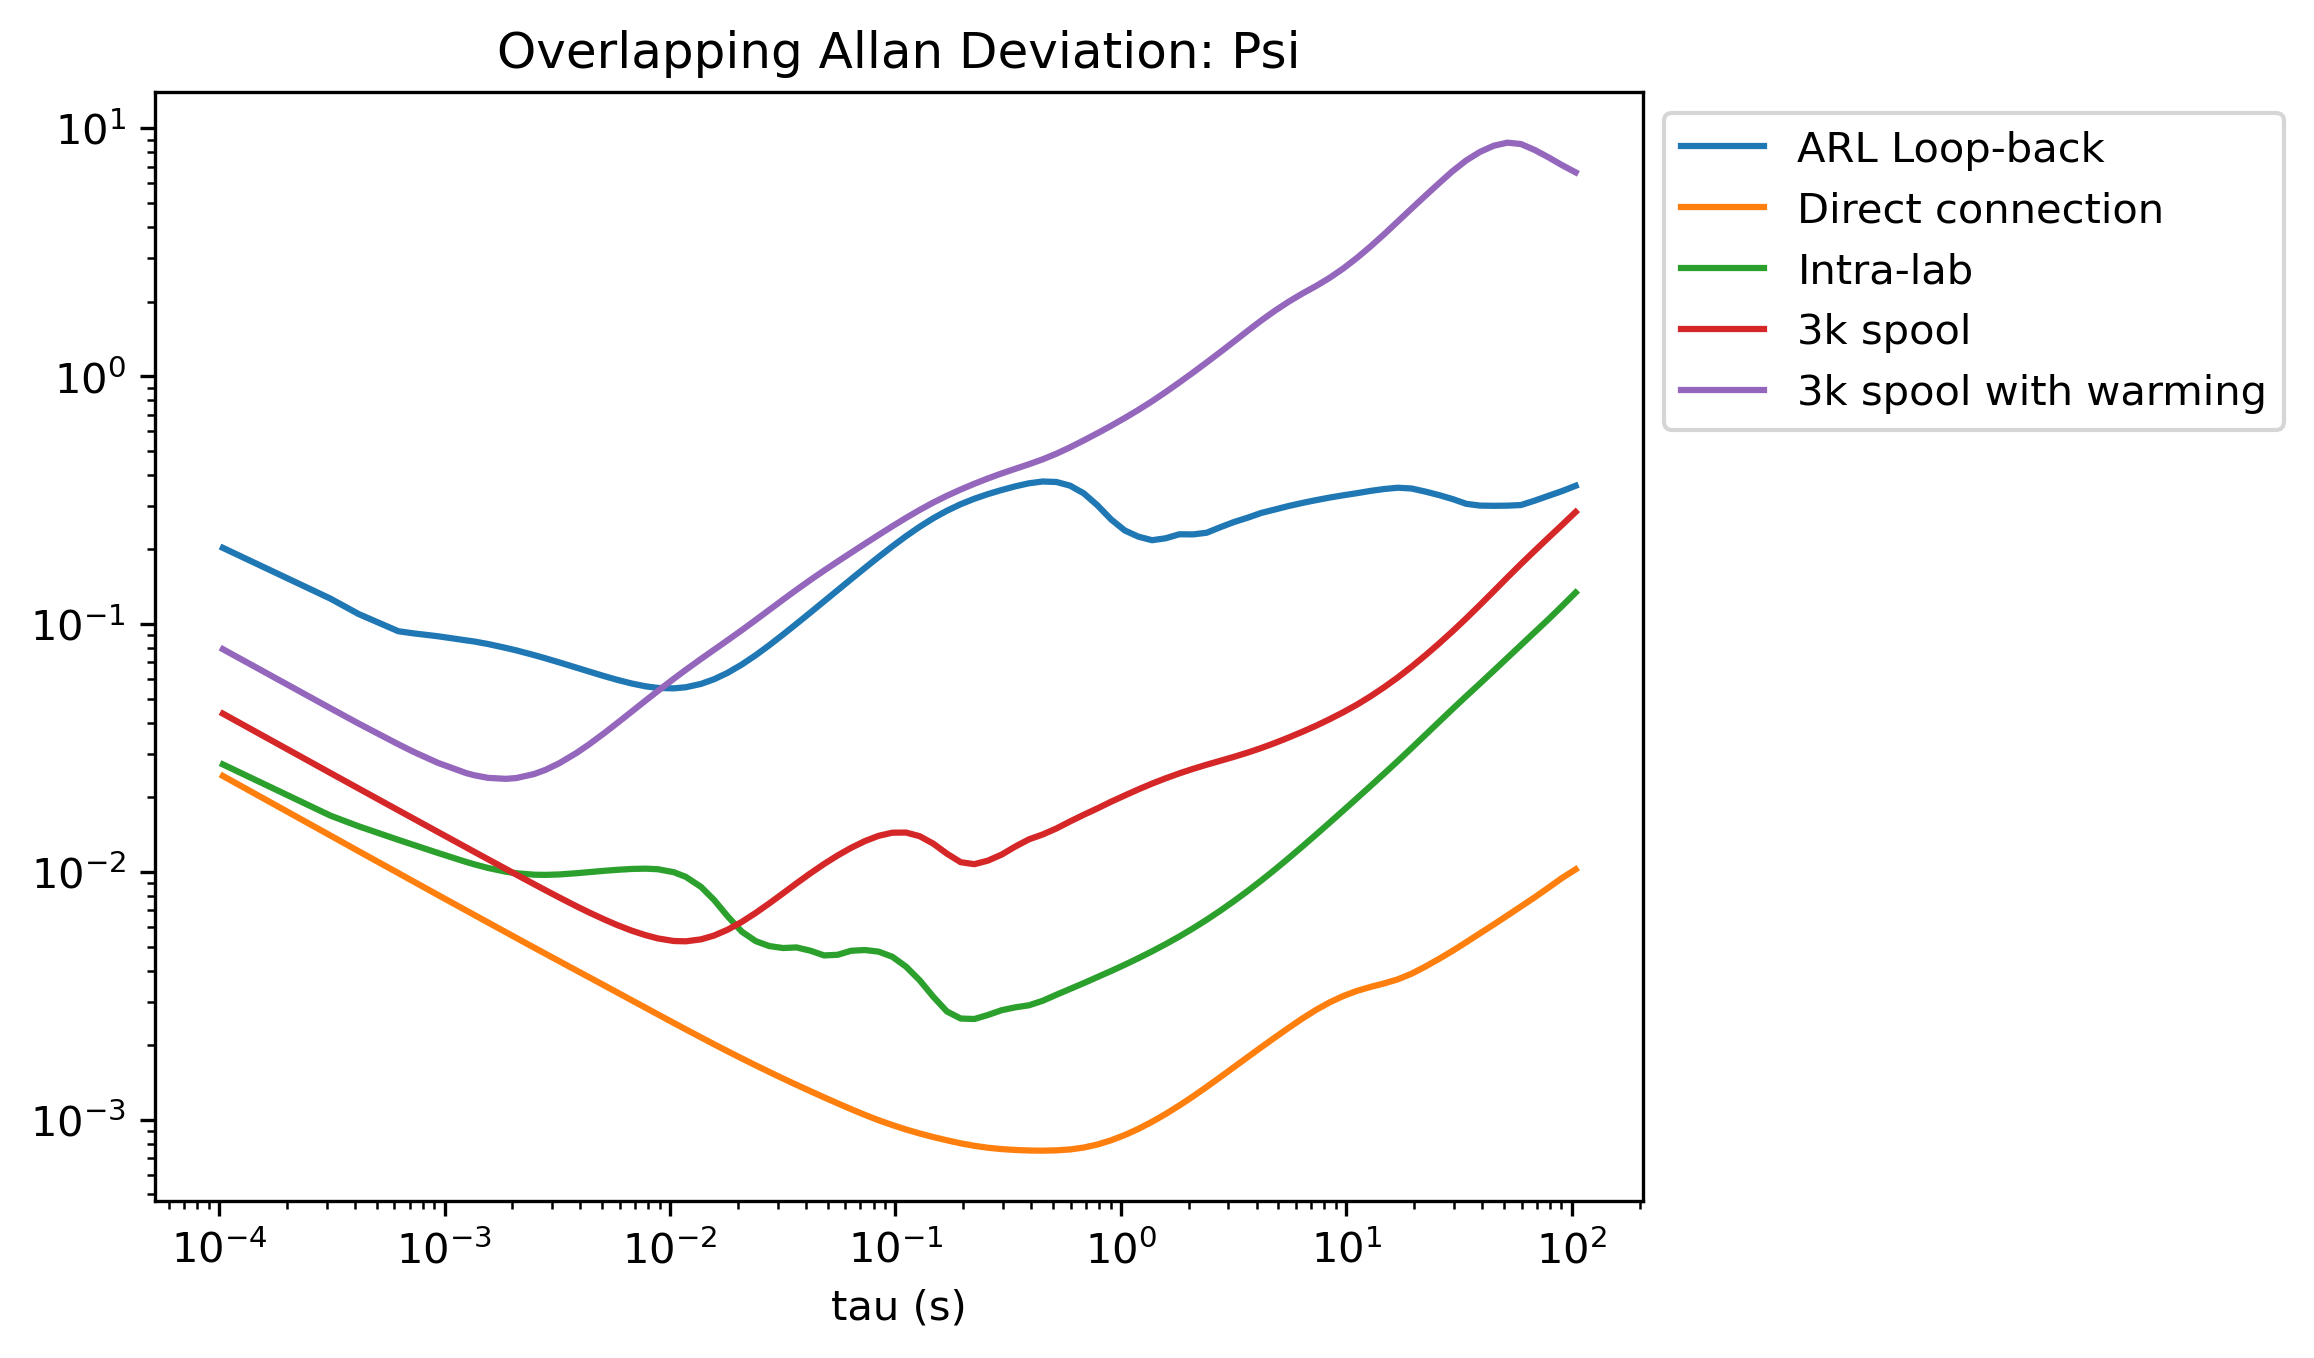

In [69]:
plt.figure(dpi=300)
plt.xscale("log")
plt.yscale("log")
plt.title("Overlapping Allan Deviation: Psi")
plt.xlabel("tau (s)")
plt.plot(Loop[0][0], Loop[0][1], label = "ARL Loop-back")
plt.plot(Dir[0][0], Dir[0][1], label= "Direct connection")
plt.plot(Lab[0][0], Lab[0][1], label = "Intra-lab")
plt.plot(Threek[0][0], Threek[0][1], label = "3k spool")
plt.plot(Warm3k[0][0], Warm3k[0][1], label = "3k spool with warming")
plt.legend(bbox_to_anchor=(1,1))

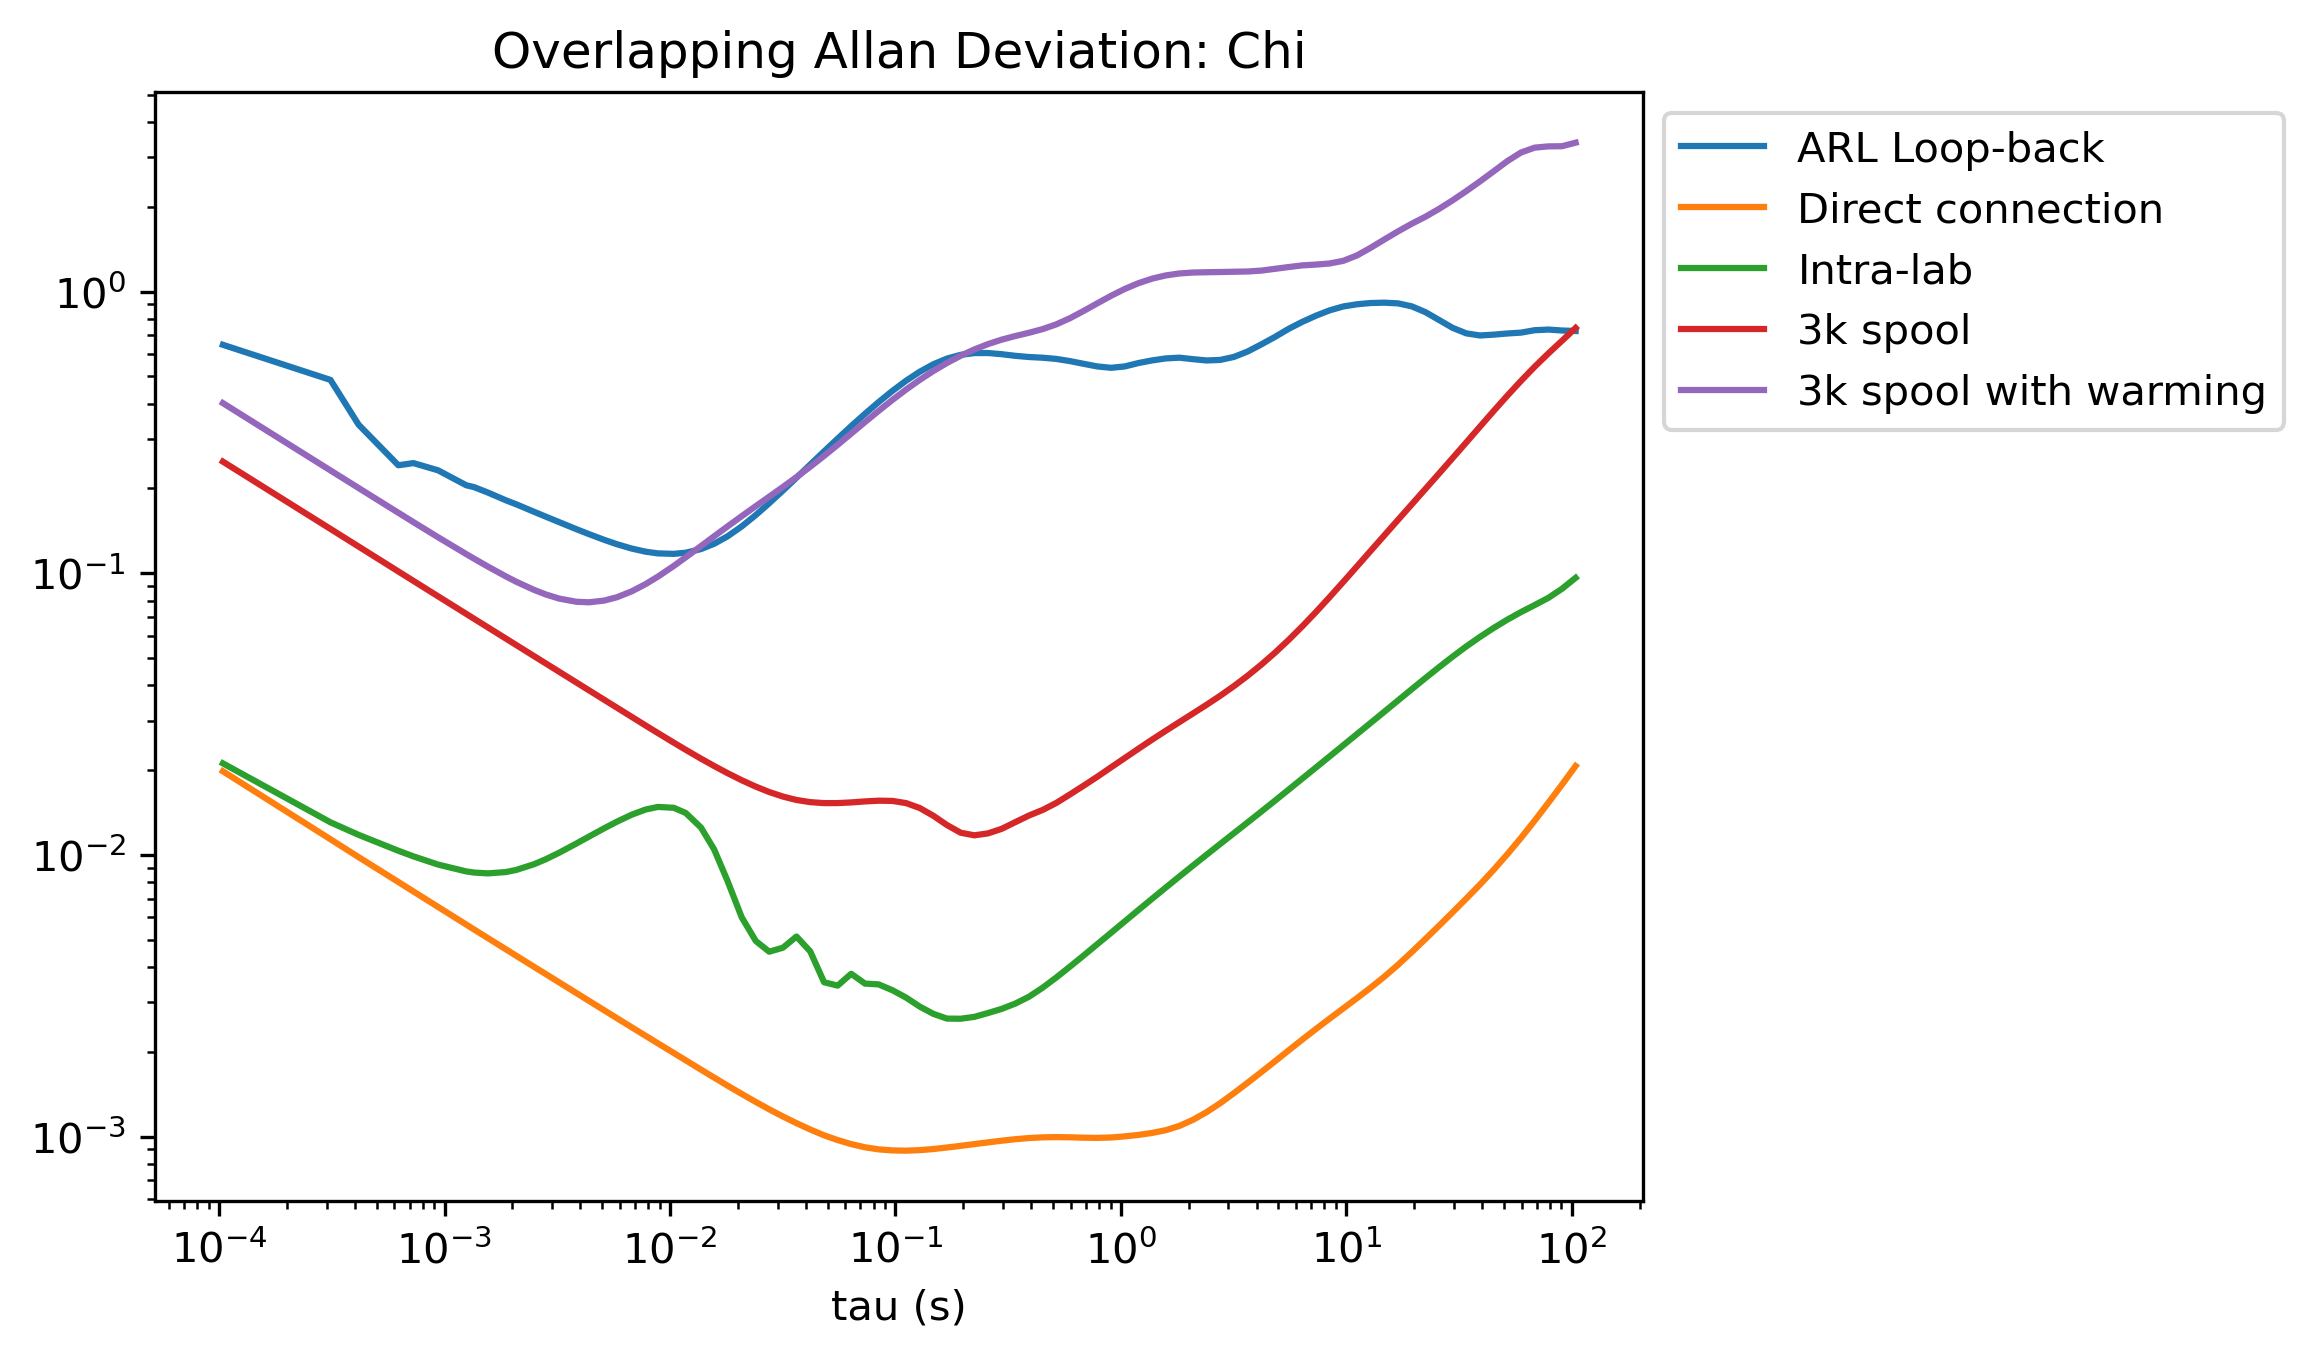

In [68]:
plt.figure(dpi=300)
plt.xscale("log")
plt.yscale("log")
plt.title("Overlapping Allan Deviation: Chi")
plt.xlabel("tau (s)")
plt.plot(Loop[1][0], Loop[1][1], label = "ARL Loop-back")
plt.plot(Dir[1][0], Dir[1][1], label= "Direct connection")
plt.plot(Lab[1][0], Lab[1][1], label = "Intra-lab")
plt.plot(Threek[1][0], Threek[1][1], label = "3k spool")
plt.plot(Warm3k[1][0], Warm3k[1][1], label = "3k spool with warming")
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
plt.figure(dpi=300)
plt.xscale("log")
plt.yscale("log")
plt.title("Overlapping Allan Deviation: Psi")
plt.xlabel("tau (s)")
plt.plot(Loop[0][0], Loop[0][1], label = "ARL Loop-back")
plt.plot(Dir[0][0], Dir[0][1], label= "Direct connection")
plt.plot(Lab[0][0], Lab[0][1], label = "Intra-lab")
plt.plot(Threek[0][0], Threek[0][1], label = "3k spool")
plt.plot(Warm3k[0][0], Warm3k[0][1], label = "3k spool with warming")

In [10]:
AVLoop, devLoop = AllanVariancePolarArray(eLoop, stepArr)
ADLoop = AVLoop**0.5

In [11]:
AVDir, devDir = AllanVariancePolarArray(eDir, stepArr)
ADDir = AVDir**0.5

In [12]:
AVLab, devLab = AllanVariancePolarArray(eLab, stepArr)
ADLab = AVLab**0.5

In [13]:
AV3k, dev3k = AllanVariancePolarArray(e3k, stepArr)
AD3k = AV3k**0.5

In [14]:
AV3kWarm, dev3kWarm = AllanVariancePolarArray(e3kWarm, stepArr)
AD3kWarm = AV3kWarm**0.5

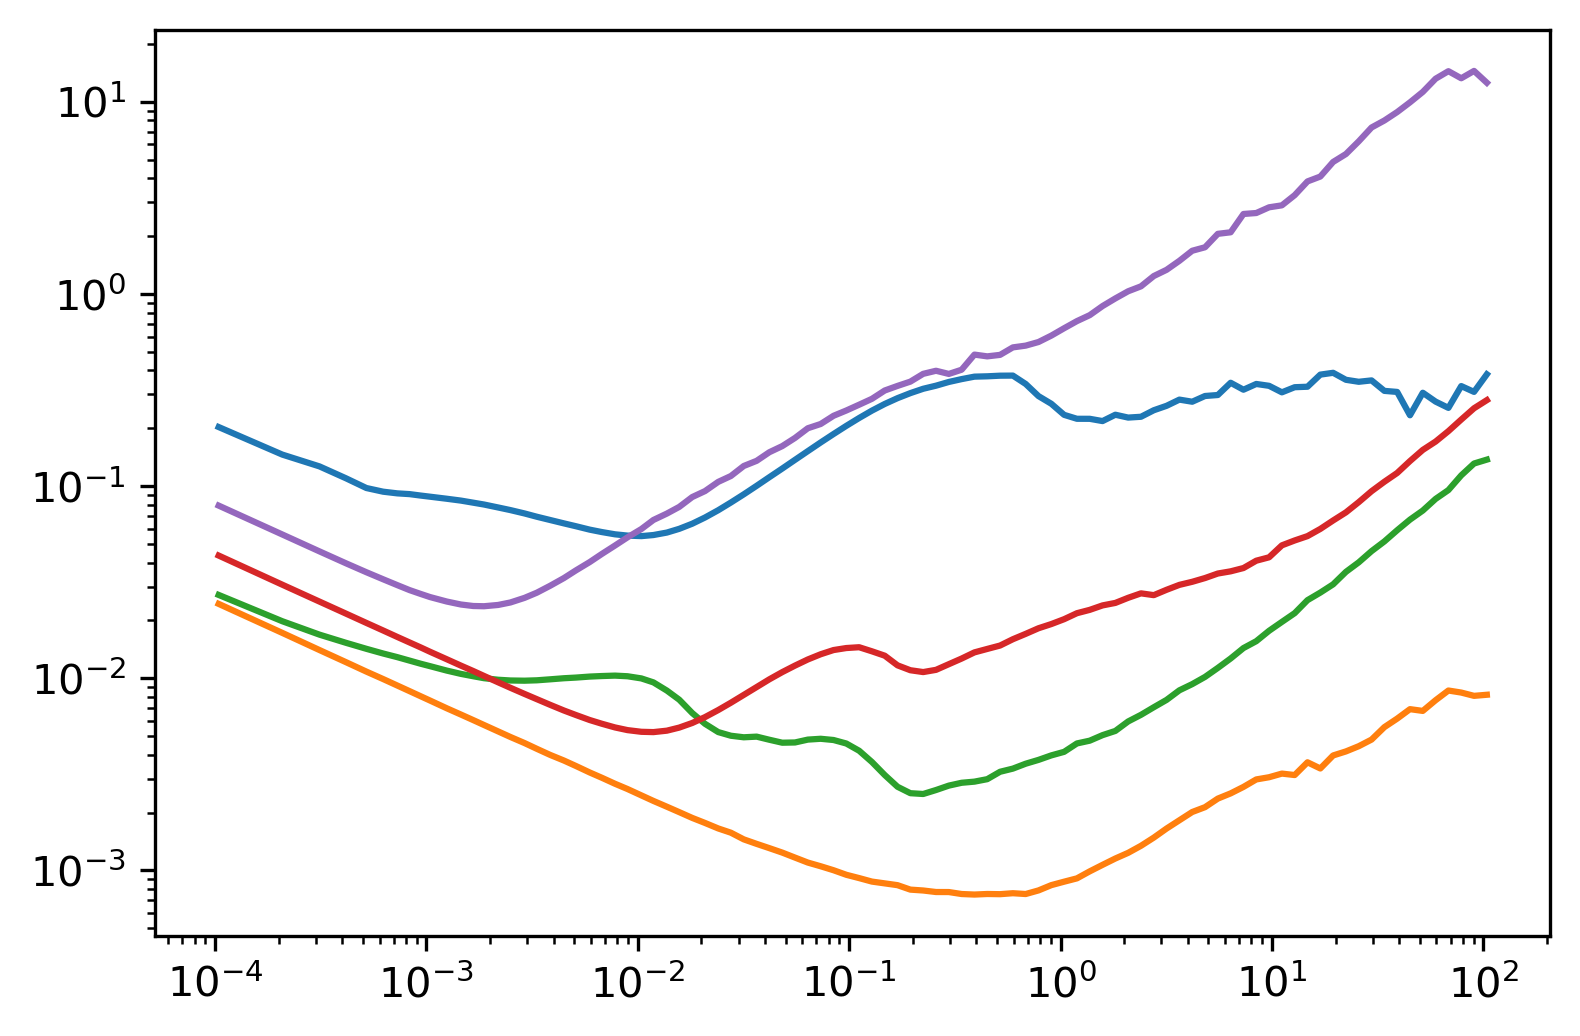

In [15]:
plt.figure(dpi=300)
plt.plot(tauArr, ADLoop[:,0], label = "ARL loop")
plt.plot(tauArr, ADDir[:,0], label = "Direct")
plt.plot(tauArr, ADLab[:,0], label = "Lab")
plt.plot(tauArr, AD3k[:,0], label = "3k")
plt.plot(tauArr, AD3kWarm[:,0], label = "3k Warming")
plt.xscale("log")
plt.yscale("log")

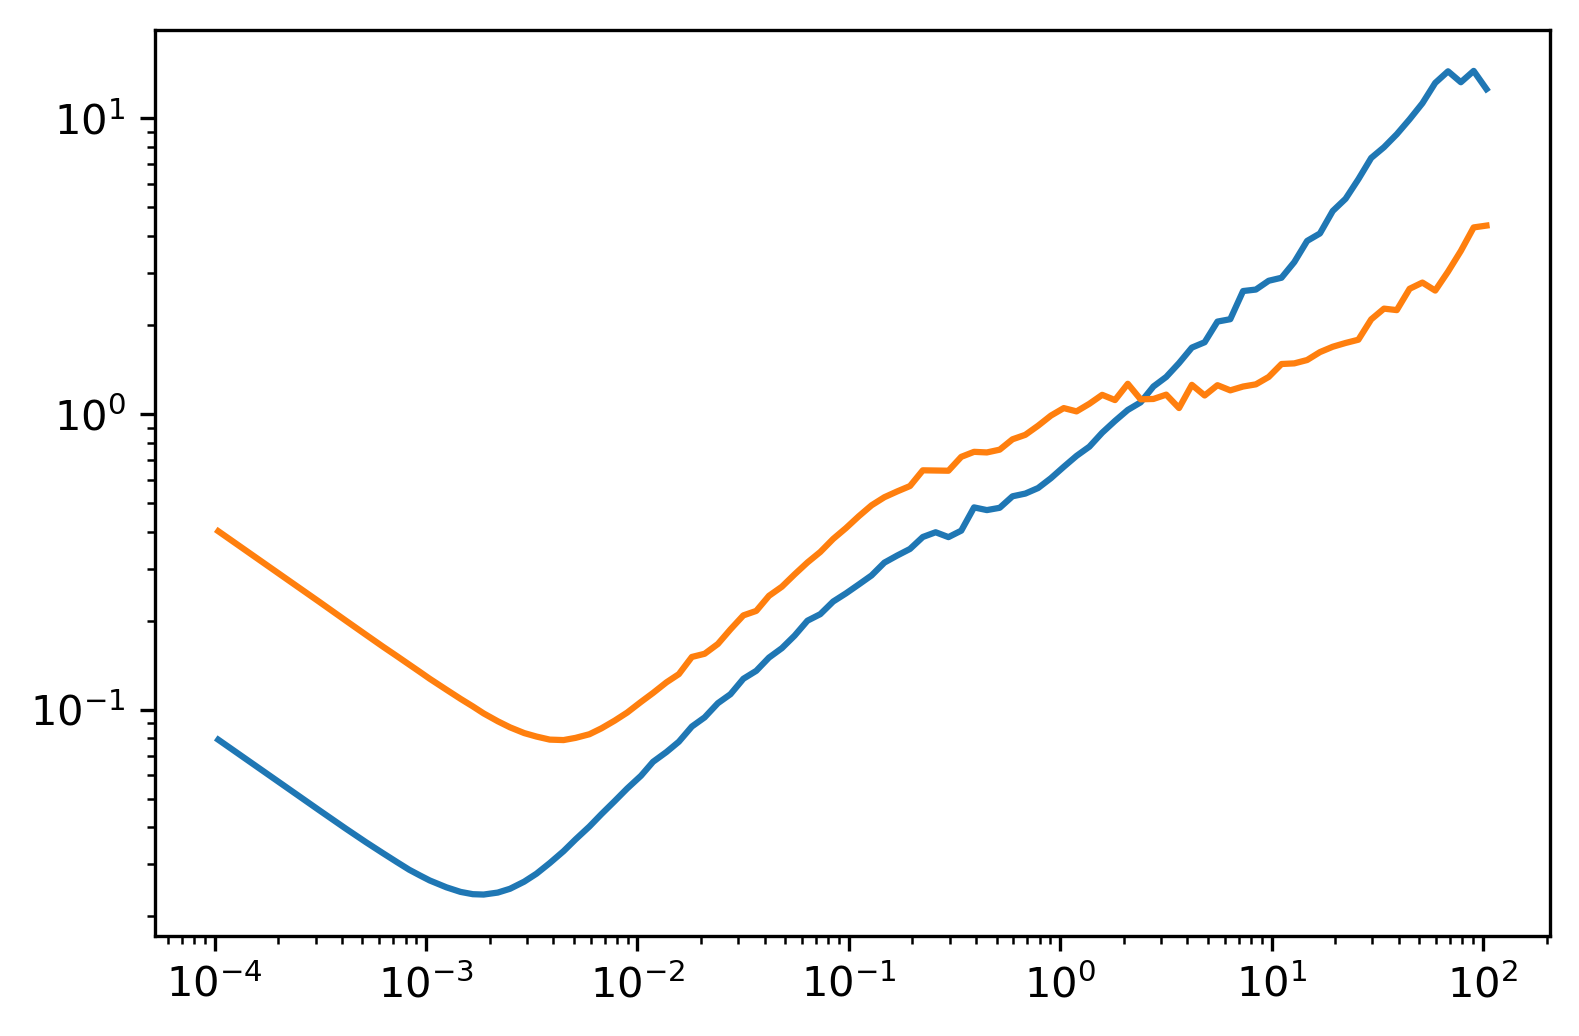

In [22]:
AV3kWarm, dev3kWarm = AllanVariancePolarArray(e3kWarm, stepArr)
AD3kWarm = AV3kWarm**0.5
plt.figure(dpi=300)
plt.plot(tauArr, AD3kWarm[:,0], label = "psi")
plt.plot(tauArr, AD3kWarm[:,1], label = "chi")
plt.xscale("log")
plt.yscale("log")

In [5]:
e3kWarm = stokesToEllipseArray(p3kWarm)

In [2]:
import AllanDevTK

In [3]:
dir(AllanDevTK)

['AllanVariancePolar',
 'Volt_to_PState',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'normalize',
 'np',
 'pd',
 'plt',
 'stokesToEllipse',
 'stokesToEllipseArray',
 'time']

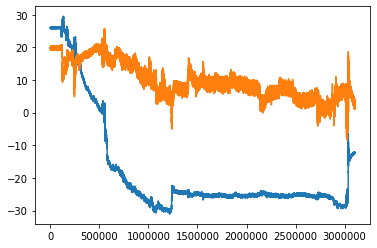

In [17]:
plt.plot(e3kWarm)

In [9]:
stepArr = np.linspace(0,6,100)
stepArr = 10**stepArr
stepArr = [int(x) for x in stepArr]
stepArr = np.unique(stepArr)
AV3kWarm = AllanVariancePolarArray(e3kWarm, stepArr) 

In [7]:
AVpsi3kWarm = AV3kWarm[0][:,0]

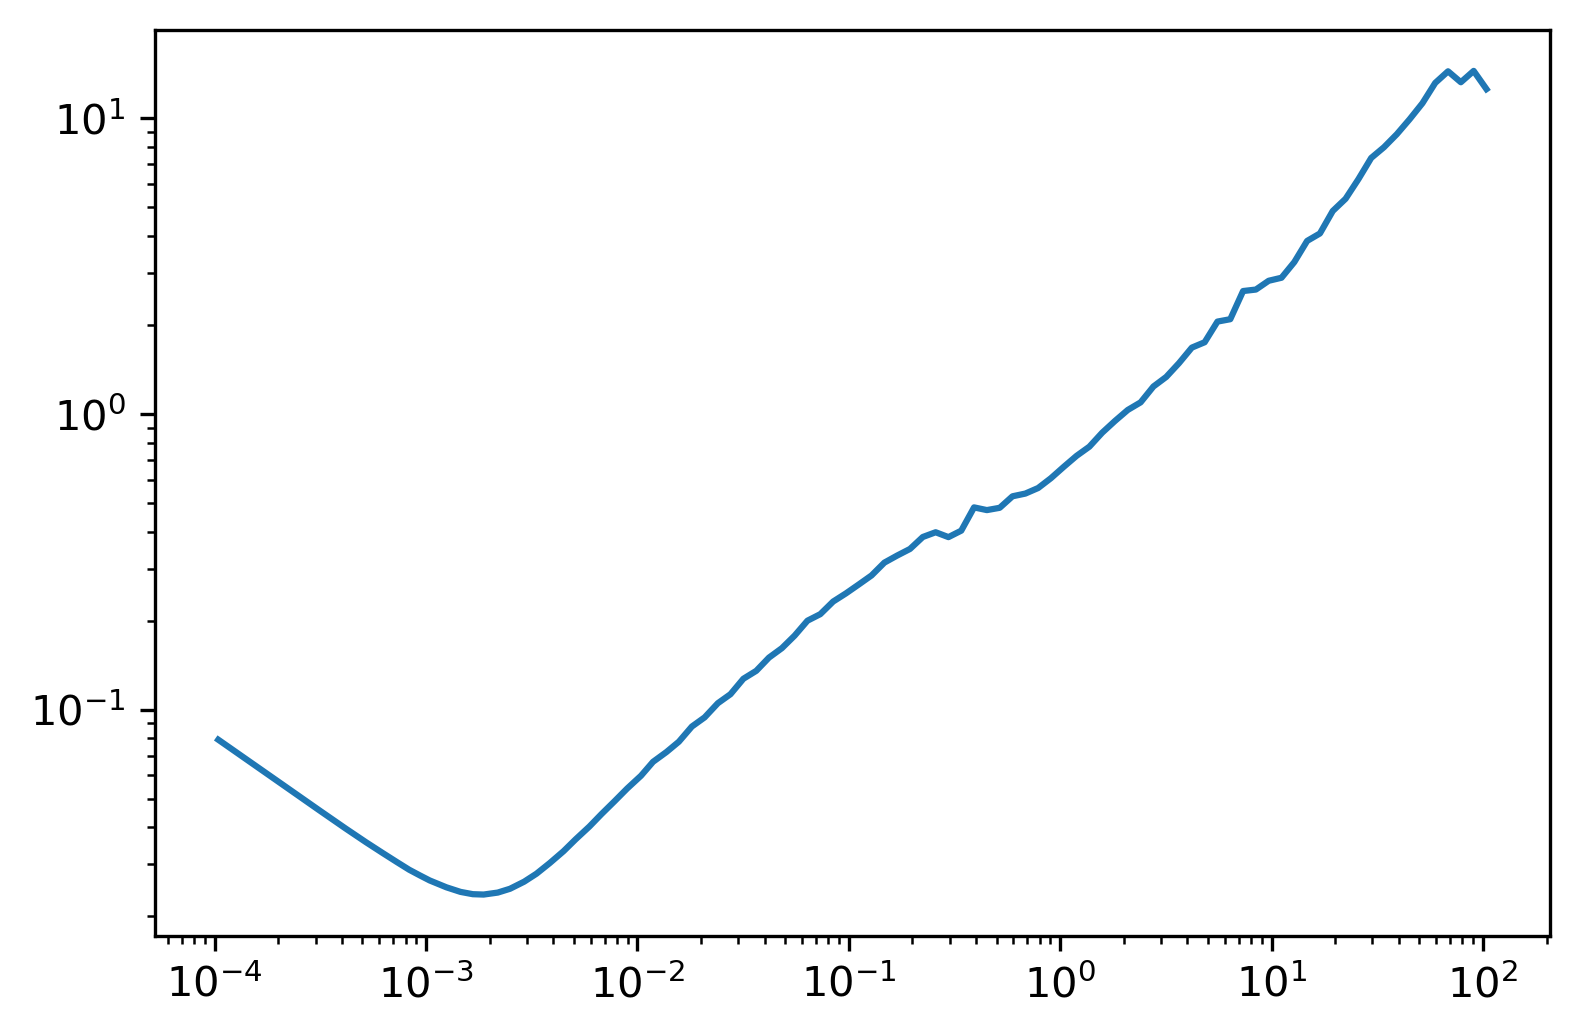

In [19]:
plt.figure(dpi=300)
plt.plot(stepArr*104*10**-6, AV3kWarm[0][:,0]**0.5)
plt.xscale("log")
plt.yscale("log")

In [20]:
stepArr = np.linspace(0,6,100)
stepArr = 10**stepArr
stepArr = [int(x) for x in stepArr]
stepArr = np.unique(stepArr) 
tau = 104*10**-6 #sample period
tauArr = stepArr*tau

In [43]:
psi = eLoop[:,0]
taus2, ad, ade, ns = allantools.adev(psi, rate = tau**-1, taus=tauArr, data_type="freq")

In [35]:
ns

array([5.999999e+06, 1.999999e+06, 1.499999e+06, 9.999990e+05,
       8.571410e+05, 6.666650e+05, 4.999990e+05, 4.615370e+05,
       3.999990e+05, 3.333320e+05, 2.999990e+05, 2.499990e+05,
       2.222210e+05, 1.935470e+05, 1.621610e+05, 1.428560e+05,
       1.224470e+05, 1.071410e+05, 9.230600e+04, 7.999900e+04,
       7.058700e+04, 5.999900e+04, 5.309600e+04, 4.545300e+04,
       3.973400e+04, 3.468100e+04, 2.999900e+04, 2.597300e+04,
       2.264000e+04, 1.967100e+04, 1.714100e+04, 1.488700e+04,
       1.293000e+04, 1.125600e+04, 9.802000e+03, 8.509000e+03,
       7.406000e+03, 6.436000e+03, 5.596000e+03, 4.869000e+03,
       4.233000e+03, 3.684000e+03, 3.202000e+03, 2.784000e+03,
       2.421000e+03, 2.106000e+03, 1.832000e+03, 1.593000e+03,
       1.385000e+03, 1.204000e+03, 1.047000e+03, 9.110000e+02,
       7.920000e+02, 6.880000e+02, 5.990000e+02, 5.200000e+02,
       4.520000e+02, 3.930000e+02, 3.420000e+02, 2.970000e+02,
       2.580000e+02, 2.240000e+02, 1.950000e+02, 1.6900

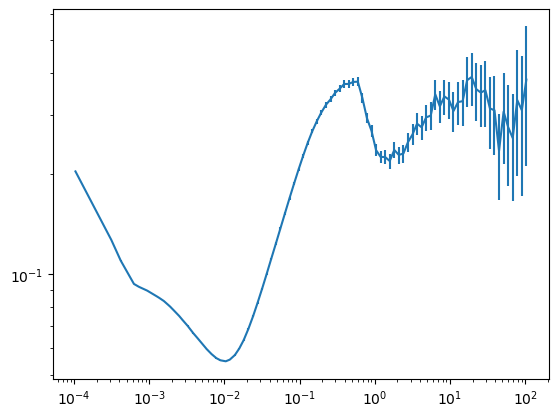

In [34]:
plt.errorbar(taus2, ad, yerr = ade)
plt.xscale("log")
plt.yscale("log")

In [36]:
taus2o, ado, adeo, ns = allantools.oadev(psi, rate = tau**-1, taus=tauArr, data_type="freq")

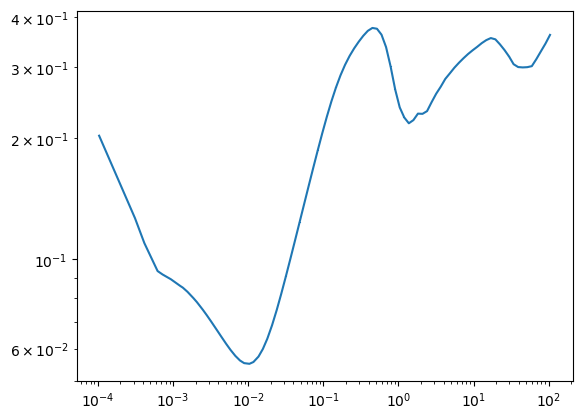

In [37]:
plt.errorbar(taus2o, ado, yerr = adeo)
plt.xscale("log")
plt.yscale("log")